# Handout 02: Statistical Testing Procedures, Size and Power

In [1]:
#@title Imports
#!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt
%matplotlib inline

## Exer 2.1: Fair or Unfair die?

**Note:** because the RVs here are discrete, when approximating some of the = probabilities below, you need to be careful with fractions and rounding. This is why you'll see things like $\{X \ge 11 / 12\}$ represented as `x.count_geq(11 / 12 - 0.00001)` instead of `x.count_geq(11 / 12)` or `x.count_geq(0.9167)`.

## Size: Null hypothesis - Fair Die

In [2]:
n = 12

P_H0 = BoxModel([1, 2, 3, 4, 5, 6], probs = [1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6]) ** n

### Test A Size: Reject $H_0$ if $N_1 \ge 4$

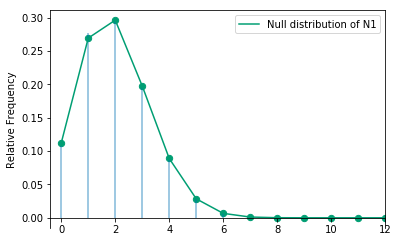

In [3]:
N1_H0 = RV(P_H0, count_eq(1))

n1_H0 = N1_H0.sim(10000)
n1_H0.plot()

Binomial(n, 1 / 6).plot()
plt.legend(['Null distribution of N1']);

In [4]:
cA = 4

n1_H0.count_geq(cA) / n1_H0.count(), 1 - Binomial(n, 1 / 6).cdf(cA - 1)

(0.1248, 0.12517809268000224)

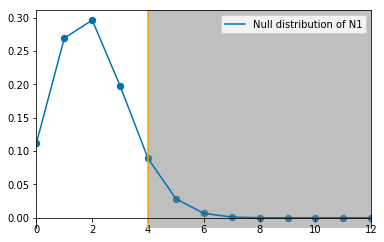

In [5]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

### Test B size

In [6]:
cB = 5

n1_H0.count_geq(cB) / n1_H0.count(), 1 - Binomial(n, 1 / 6).cdf(cB - 1)

(0.0376, 0.03635002209058713)

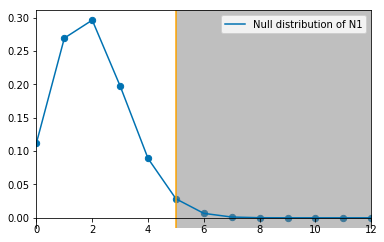

In [7]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(cB, n, alpha = 0.5, color = 'gray');

### Test C size

(0.04, 0.03635002209058713)

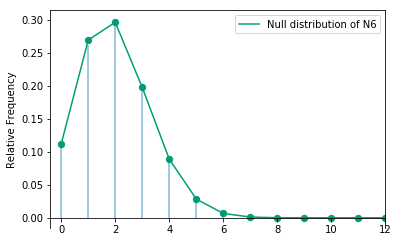

In [8]:
N6_H0 = RV(P_H0, count_eq(6))

n6_H0 = N6_H0.sim(10000)
n6_H0.plot()

Binomial(n, 1 / 6).plot()
plt.legend(['Null distribution of N6']);

n6_H0.count_geq(5) / n6_H0.count(), 1 - Binomial(n, 1 / 6).cdf(4)

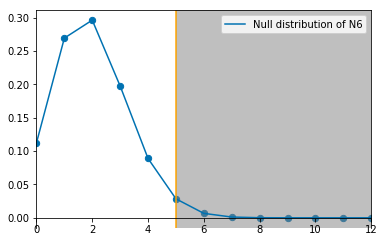

In [9]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N6']);
plt.xlim(0, n);
plt.axvline(x = 5, color = 'orange');
plt.axvspan(cB, n, alpha = 0.5, color = 'gray');

### Test D size

In [10]:
n6_H0.count_eq(0) / n6_H0.count(), Binomial(n, 1 / 6).cdf(0)

(0.1091, 0.11215665478461515)

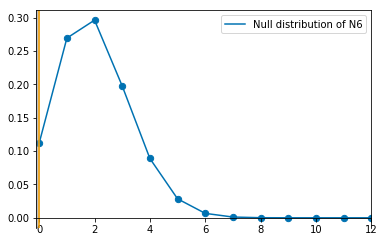

In [11]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N6']);
plt.xlim(0 - 0.1, n);
plt.axvline(x = 0, color = 'orange');
plt.axvspan(-0.1, 0, alpha = 0.5, color = 'gray');

### Test E size

0.2355

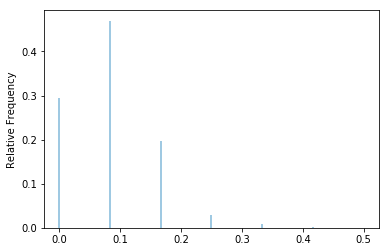

In [12]:
D1_H0 = abs(N1_H0 - n * 1 / 6) / n

d1_H0 = D1_H0.sim(10000)
d1_H0.plot()

d1_H0.count_geq(2 / n - 0.0001) / d1_H0.count()

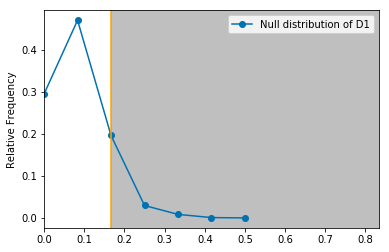

In [13]:
d1_H0.plot('density')

plt.legend(['Null distribution of D1']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 2 / n, color = 'orange');
plt.axvspan(2 / n, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test F size: Reject $H_0$ if $D \ge 3 /12$

0.2132

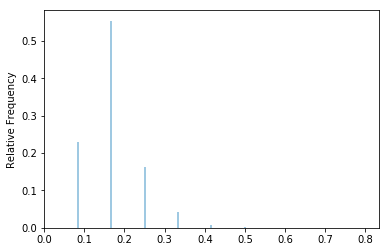

In [14]:
def maxdiff(x):
    return max([abs(x.count_eq(j) / n - 1 / 6) for j in [1, 2, 3, 4, 5, 6]])

D_H0 = RV(P_H0, maxdiff)

d_H0 = D_H0.sim(10000)
d_H0.plot()
plt.xlim(0, 1 - 1 / 6);

d_H0.count_geq(3 / n - 0.0001) / d_H0.count()

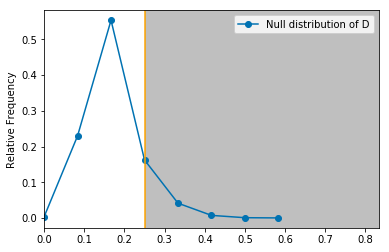

In [15]:
d_H0.plot('density')

plt.legend(['Null distribution of D']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 3 / n, color = 'orange');
plt.axvspan(3 / n, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test G size

0.0369

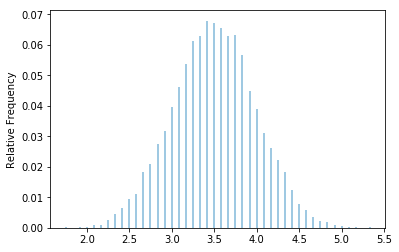

In [16]:
Xbar_H0 = RV(P_H0, mean)

xbar_H0 = Xbar_H0.sim(10000)
xbar_H0.plot()

xbar_H0.count_leq(31 / 12 + 0.0001) / xbar_H0.count()

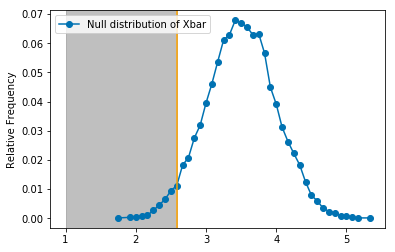

In [17]:
xbar_H0.plot('density')

plt.legend(['Null distribution of Xbar']);
plt.axvline(x = 31 / 12, color = 'orange');
plt.axvspan(1, 31 / 12, alpha = 0.5, color = 'gray');

### Test H size

In [18]:
abs(xbar_H0 - 3.5).count_geq(11 / 12 - 0.0001) / xbar_H0.count()

0.073

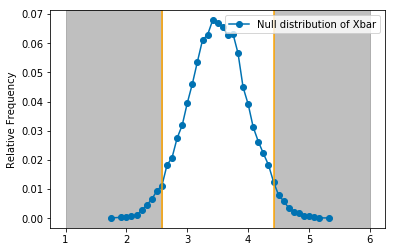

In [19]:
xbar_H0.plot('density')

plt.legend(['Null distribution of Xbar']);
plt.axvline(x = 31 / 12, color = 'orange');
plt.axvline(x = 53 / 12, color = 'orange');
plt.axvspan(1, 31 / 12, alpha = 0.5, color = 'gray');
plt.axvspan(53 / 12, 6, alpha = 0.5, color = 'gray');

### Test Yours!

In [20]:
# Test Yours here

## Power: Alternative Hypothesis - Double-1 Die

In [21]:
n = 12

P_H1 = BoxModel([1, 2, 3, 4, 5], probs = [2 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6]) ** n

### Test A power

(0.6119, 0.6069253219077941)

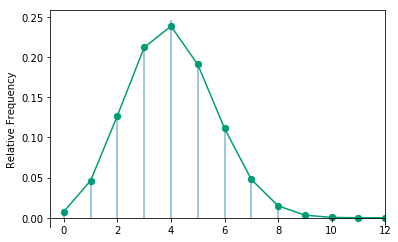

In [22]:
N1_H1 = RV(P_H1, count_eq(1))

n1_H1 = N1_H1.sim(10000)
n1_H1.plot()

Binomial(n, 2 / 6).plot()

n1_H1.count_geq(4) / n1_H1.count(), 1 - Binomial(n, 2 / 6).cdf(3)

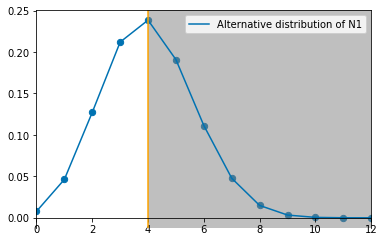

In [23]:
Binomial(n, 2 / 6).plot()

plt.legend(['Alternative distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

Comparison of Size and Power

(0.12517809268000224, 0.6069253219077941)

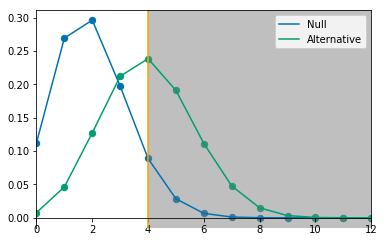

In [24]:
Binomial(n, 1 / 6).plot()
Binomial(n, 2 / 6).plot()

plt.xlim(0, n)
plt.legend(['Null', 'Alternative']);
plt.axvline(x = 4, color = 'orange');
plt.axvspan(4, n, alpha=0.5, color='gray');

1 - Binomial(n, 1 / 6).cdf(4 - 1), 1 - Binomial(n, 2 / 6).cdf(4 - 1)

### Test B power

In [25]:
n1_H1.count_geq(5) / n1_H1.count(), 1 - Binomial(n, 2 / 6).cdf(4)

(0.3656, 0.36847928556509557)

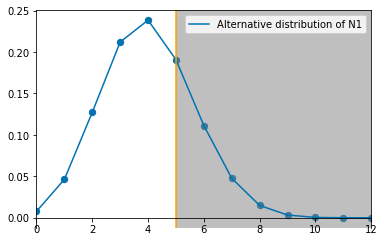

In [26]:
Binomial(n, 2 / 6).plot()

plt.legend(['Alternative distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(cB, n, alpha = 0.5, color = 'gray');

### Test C and Test D power

No computation necessary!!!

### Test E power

0.615

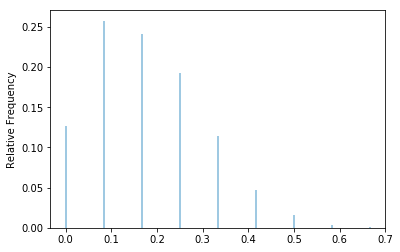

In [27]:
D1_H1 = abs(N1_H1 - n * 1 / 6) / n

d1_H1 = D1_H1.sim(10000)
d1_H1.plot()

d1_H1.count_geq(2 / 12 - 0.0001) / d1_H1.count()

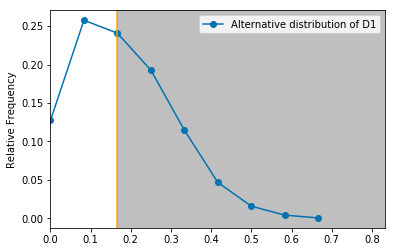

In [28]:
d1_H1.plot('density')

plt.legend(['Alternative distribution of D1']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 2 / 12, color = 'orange');
plt.axvspan(2 / 12, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test F power

0.4983

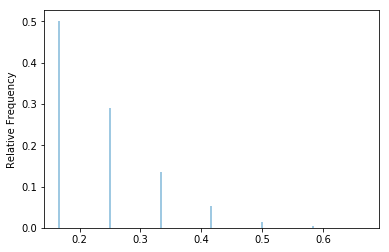

In [29]:
def maxdiff(x):
    return max([abs(x.count_eq(j) / n - 1 / 6) for j in [1, 2, 3, 4, 5, 6]])

D_H1 = RV(P_H1, maxdiff)

d_H1 = D_H1.sim(10000)
d_H1.plot()

d_H1.count_geq(3 / 12 - 0.0001) / d_H1.count()

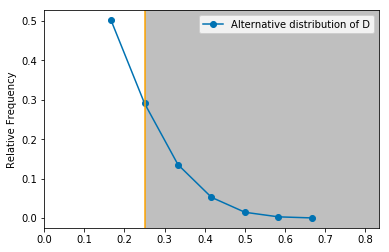

In [30]:
d_H1.plot('density')

plt.legend(['Alternative distribution of D']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 3 / 12, color = 'orange');
plt.axvspan(3 / 12, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test G power

0.4678

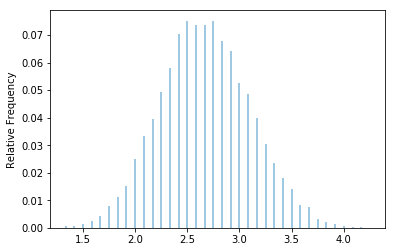

In [31]:
Xbar_H1 = RV(P_H1, mean)

xbar_H1 = Xbar_H1.sim(10000)
xbar_H1.plot()

xbar_H1.count_leq(31 / 12 + 0.0001) / xbar_H1.count()

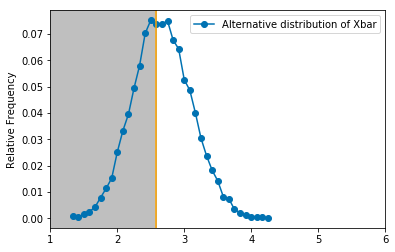

In [32]:
xbar_H1.plot('density')

plt.legend(['Alternative distribution of Xbar']);
plt.xlim(1, 6);
plt.axvline(x = 31 / 12, color = 'orange');
plt.axvspan(1, 31 / 12, alpha = 0.5, color = 'gray');

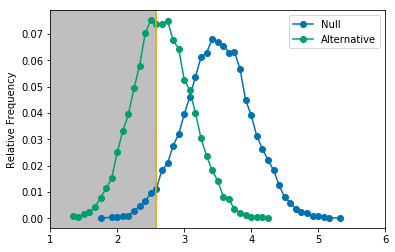

In [33]:
c_Xbar = 31 / 12

xbar_H0.plot('density')
xbar_H1.plot('density')
plt.xlim(1, 6);
plt.legend(['Null', 'Alternative']);
plt.axvline(x = c_Xbar, color = 'orange');
plt.axvspan(1, c_Xbar, alpha = 0.5, color = 'gray');

### Test H power

In [34]:
abs(xbar_H1 - 3.5).count_geq(11 / 12 - 0.0001) / xbar_H1.count()

0.4678

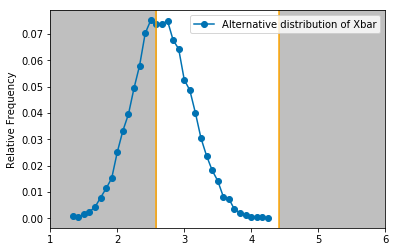

In [35]:
xbar_H1.plot('density')

plt.legend(['Alternative distribution of Xbar']);
plt.xlim(1, 6);
plt.axvline(x = 31 / 12, color = 'orange');
plt.axvspan(1, 31 / 12, alpha = 0.5, color = 'gray');
plt.axvline(x = 53 / 12, color = 'orange');
plt.axvspan(53 / 12, 6, alpha = 0.5, color = 'gray');

## Most powerful level 0.05 tests for each test statistic

In [36]:
n = 12

P_H0 = BoxModel([1, 2, 3, 4, 5, 6]) ** n

P_H1 = BoxModel([1, 1, 2, 3, 4, 5]) ** n

### Reject $H_0$ if $N_1\ge 5$; that is, Reject $H_0$ if $\hat{p}_1\ge 5 / 12$

Size

0.03635002209058713

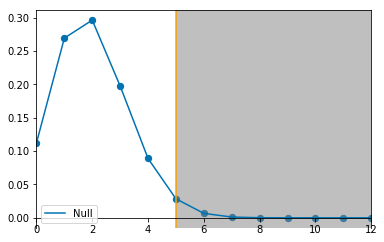

In [37]:
cA = 5

Binomial(n, 1 / 6).plot()

plt.xlim(0, n);
plt.legend(['Null']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, 1 / 6).cdf(cA - 1)

Power

0.36847928556509557

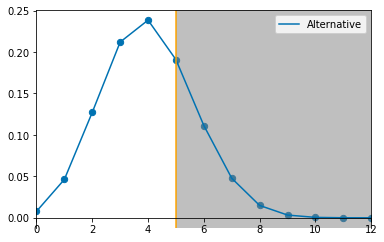

In [38]:
Binomial(n, 2 / 6).plot()

plt.xlim(0, n);
plt.legend(['Alternative']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, 2 / 6).cdf(cA - 1)

### Size and Power: Reject $H_0$ if $N_1\ge 5$; that is, Reject $H_0$ if $\hat{p}_1\ge 5 / 12$

(0.03635002209058713, 0.36847928556509557)

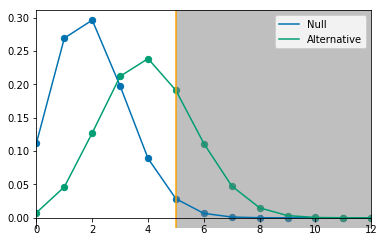

In [39]:
Binomial(n, 1 / 6).plot()
Binomial(n, 2 / 6).plot()
plt.xlim(0, n)
plt.legend(['Null', 'Alternative']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha=0.5, color='gray');

1 - Binomial(n, 1 / 6).cdf(cA - 1), 1 - Binomial(n, 2 / 6).cdf(cA - 1)

### Reject $H_0$ if $D \ge 4 / 12$

Size

0.0486

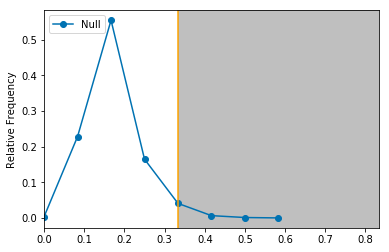

In [40]:
cD = 4 / 12

def maxdiff(x):
    return max([abs(x.count_eq(j) / n - 1 / 6) for j in [1, 2, 3, 4, 5, 6]])

d_H0 = RV(P_H0, maxdiff).sim(10000)

d_H0.plot('density')

plt.xlim(0, 1 - 1 / 6);
plt.legend(['Null']);
plt.axvline(x = cD, color = 'orange');
plt.axvspan(cD, 1, alpha = 0.5, color = 'gray');

d_H0.count_geq(cD - 0.0001) / 10000

Power

0.1999

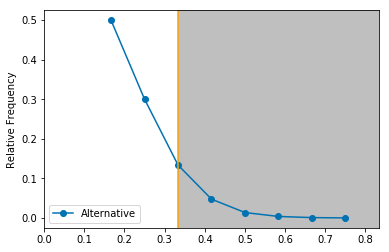

In [41]:
d_H1 = RV(P_H1, maxdiff).sim(10000)

d_H1.plot('density')

plt.xlim(0, 1 - 1 / 6);
plt.legend(['Alternative']);
plt.axvline(x = cD, color = 'orange');
plt.axvspan(cD, 1, alpha = 0.5, color = 'gray');

d_H1.count_geq(cD - 0.0001) / 10000

### Size and power: Reject $H_0$ if $D \ge 4 / 12$

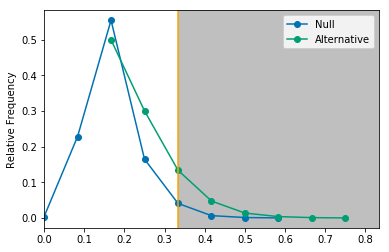

In [42]:
d_H0.plot('density')
d_H1.plot('density')
plt.xlim(0, 1 - 1 / 6);
plt.legend(['Null', 'Alternative']);
plt.axvline(x = cD, color = 'orange');
plt.axvspan(cD, 1, alpha = 0.5, color = 'gray');

### Reject $H_0$ if $\bar{X} \le 31 / 12 \approx 2.583$

Note: $\bar{X}$ only takes values that are multiples of 1 / 12, so $\{\bar{X}\le 31 / 12\} = \{\bar{X} < 32 / 12\}$

Size

0.0366

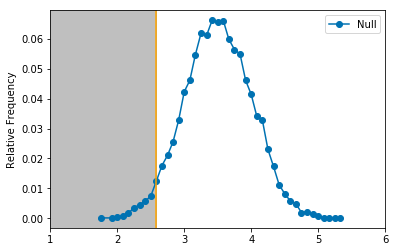

In [43]:
c_Xbar = 31 / 12

xbar_H0 = RV(P_H0, mean).sim(10000)

xbar_H0.plot('density')
plt.xlim(1, 6);
plt.legend(['Null']);
plt.axvline(x = c_Xbar, color = 'orange');
plt.axvspan(1, c_Xbar, alpha = 0.5, color = 'gray');

xbar_H0.count_lt(c_Xbar + 0.0001) / 10000

Power

0.4744

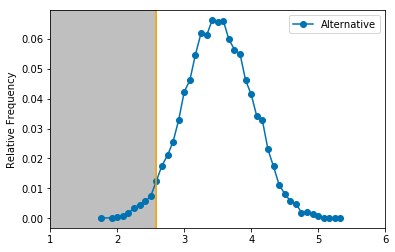

In [44]:
xbar_H1 = RV(P_H1, mean).sim(10000)

xbar_H0.plot('density')
plt.xlim(1, 6);
plt.legend(['Alternative']);
plt.axvline(x = c_Xbar, color = 'orange');
plt.axvspan(1, c_Xbar, alpha = 0.5, color = 'gray');

xbar_H1.count_lt(c_Xbar + 0.0001) / 10000

### Size and Power: Reject $H_0$ if $\bar{X} \le 31 / 12 \approx 2.583$

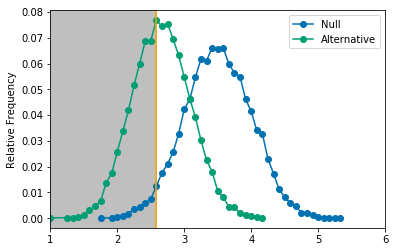

In [45]:
xbar_H0.plot('density')
xbar_H1.plot('density')
plt.xlim(1, 6);
plt.legend(['Null', 'Alternative']);
plt.axvline(x = c_Xbar, color = 'orange');
plt.axvspan(1, c_Xbar, alpha = 0.5, color = 'gray');

### Reject $H_0$ if $|\bar{X} - 3.5| \ge 13 / 12 \approx 1.083$

Note: Using 1 instead of 13/12 yields a size that is just above 0.05, so would not qualify as a level 0.05 test if the significance level is interpretted strictly.

Size

0.0341

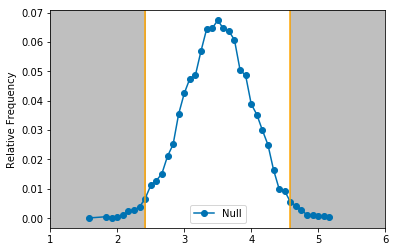

In [46]:
c_Xbar2 = 13 / 12

xbar_H0 = RV(P_H0, mean).sim(10000)

xbar_H0.plot('density')
plt.xlim(1, 6);
plt.legend(['Null']);
plt.axvline(x = 3.5 - c_Xbar2, color = 'orange');
plt.axvline(x = 3.5 + c_Xbar2, color = 'orange');
plt.axvspan(1, 3.5 - c_Xbar2, alpha = 0.5, color = 'gray');
plt.axvspan(3.5 + c_Xbar2, 6, alpha = 0.5, color = 'gray');

abs(xbar_H0 - 3.5).count_gt(c_Xbar2 - 0.0001) / 10000

Power

0.3221

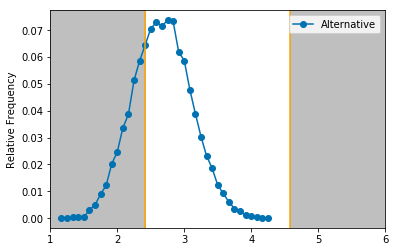

In [47]:
c_Xbar2 = 13 / 12

xbar_H1 = RV(P_H1, mean).sim(10000)

xbar_H1.plot('density')
plt.xlim(1, 6);
plt.legend(['Alternative']);
plt.axvline(x = 3.5 - c_Xbar2, color = 'orange');
plt.axvline(x = 3.5 + c_Xbar2, color = 'orange');
plt.axvspan(1, 3.5 - c_Xbar2, alpha = 0.5, color = 'gray');
plt.axvspan(3.5 + c_Xbar2, 6, alpha = 0.5, color = 'gray');

abs(xbar_H1 - 3.5).count_gt(c_Xbar2 - 0.0001) / 10000

### Size and Power: Reject $H_0$ if $|\bar{X} - 3.5| \ge 13 / 12 \approx 1.083$

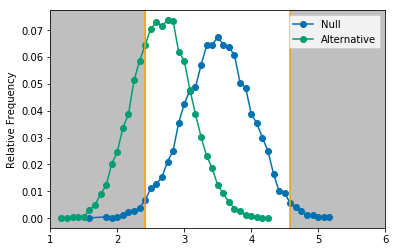

In [48]:
xbar_H0.plot('density')
xbar_H1.plot('density')
plt.xlim(1, 6);
plt.legend(['Null', 'Alternative']);
plt.axvline(x = 3.5 - c_Xbar2, color = 'orange');
plt.axvline(x = 3.5 + c_Xbar2, color = 'orange');
plt.axvspan(1, 3.5 - c_Xbar2, alpha = 0.5, color = 'gray');
plt.axvspan(3.5 + c_Xbar2, 6, alpha = 0.5, color = 'gray');

## Changing sample size

(0.03635002209058713, 0.0033390531163042247)

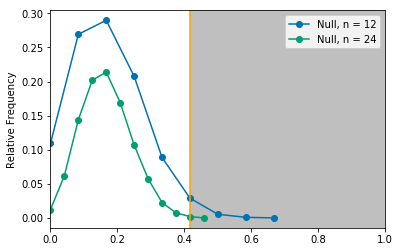

In [49]:
(RV(Binomial(12, 1 / 6)) / 12).sim(10000).plot('density')

(RV(Binomial(24, 1 / 6)) / 24).sim(10000).plot('density')

plt.xlim(0, 1);
plt.legend(['Null, n = 12', 'Null, n = 24']);
plt.axvline(x = 5 / 12, color = 'orange');
plt.axvspan(5 / 12, 1, alpha = 0.5, color = 'gray');

1 - Binomial(12, 1 / 6).cdf(5 - 1), 1 - Binomial(24, 1 / 6).cdf(10 - 1)

In [50]:
1 - Binomial(24, 1 / 6).cdf(8 - 1)

0.03544407234392377

(0.034, 0.03544407234392377)

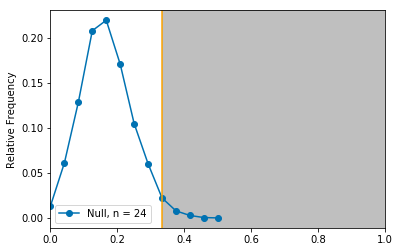

In [51]:
c0 = 8 / 24
phat1_H0 = (RV(Binomial(24, 1 / 6)) / 24).sim(10000)

phat1_H0.plot('density')
plt.xlim(0, 1);
plt.legend(['Null, n = 24']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 1, alpha = 0.5, color = 'gray');

phat1_H0.count_geq(c0 - 0.0001) / 10000, 1 - Binomial(24, 1 / 6).cdf(c0 * 24 - 1)

(0.5698, 0.5761953516216165)

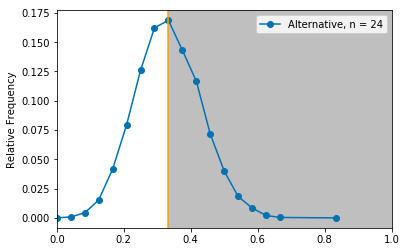

In [52]:
phat1_H1 = (RV(Binomial(24, 2 / 6)) / 24).sim(10000)

phat1_H1.plot('density')
plt.xlim(0, 1);
plt.legend(['Alternative, n = 24']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 1, alpha = 0.5, color = 'gray');

phat1_H1.count_geq(c0 - 0.0001) / 10000, 1 - Binomial(24, 2 / 6).cdf(c0 * 24 - 1)

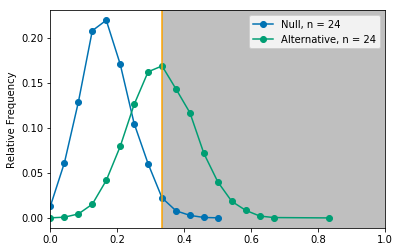

In [53]:
phat1_H0.plot('density')
phat1_H1.plot('density')

plt.xlim(0, 1);
plt.legend(['Null, n = 24', 'Alternative, n = 24']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 1, alpha = 0.5, color = 'gray');

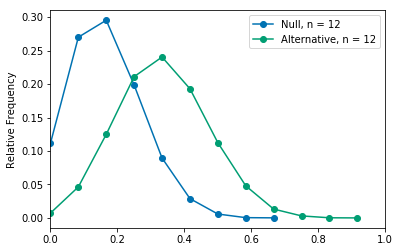

In [54]:
(RV(Binomial(12, 1 / 6)) / 12).sim(10000).plot('density')
(RV(Binomial(12, 2 / 6)) / 12).sim(10000).plot('density')

plt.xlim(0, 1);
plt.legend(['Null, n = 12', 'Alternative, n = 12']);

## Exer 2.2 - Exponential rate

### Rejection region

1.497866136776995

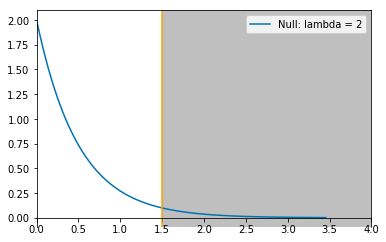

In [55]:
c0 = Exponential(rate = 2).quantile(1 - 0.05)

Exponential(rate = 2).plot()

plt.xlim(0, 4);
plt.legend(['Null: lambda = 2']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 4, alpha = 0.5, color = 'gray');
c0

In [56]:
-log(0.05) / 2

1.4978661367769954

### Power

(1.497866136776995, 0.22360679774997905)

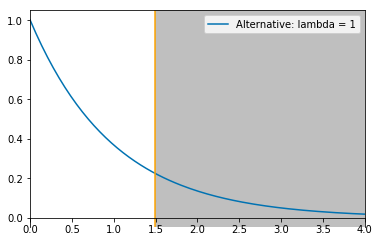

In [57]:
1 - Exponential(rate = 1).cdf(c0)

Exponential(rate = 1).plot()

plt.xlim(0, 4);
plt.legend(['Alternative: lambda = 1']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 4, alpha = 0.5, color = 'gray');
c0, 1 - Exponential(rate = 1).cdf(c0)

In [58]:
exp(-1 * c0)

0.22360679774997907

### Size and Power

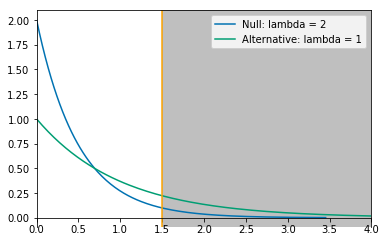

In [59]:
Exponential(rate = 2).plot()
Exponential(rate = 1).plot()

plt.xlim(0, 4);
plt.legend(['Null: lambda = 2', 'Alternative: lambda = 1']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 4, alpha = 0.5, color = 'gray');

### Reversing the Null and Alternative hypotheses

(0.051293294387550536, 0.0975)

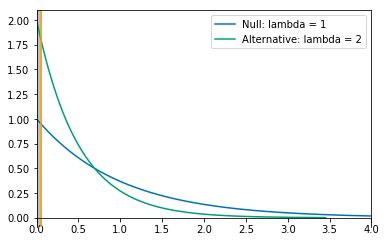

In [60]:
c0 = Exponential(rate = 1).quantile(0.05)

power = Exponential(rate = 2).cdf(c0)

Exponential(rate = 1).plot()
Exponential(rate = 2).plot()

plt.xlim(0, 4);
plt.legend(['Null: lambda = 1', 'Alternative: lambda = 2']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(0, c0, alpha = 0.5, color = 'gray');
c0, power